In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import requests
import xlrd
import matplotlib.dates as mdates
import scipy.optimize as opt
import numpy as np
import matplotlib.ticker as mtick
from arch.unitroot import ADF

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

from scipy.stats import chi2
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from scipy import stats

from io import BytesIO
from statsmodels.stats.diagnostic import breaks_hansen as hansen
from datetime import datetime

%matplotlib inline

# Data Cleaning: in Excel "Stock Chart"

# Data Processing: 


In [47]:

# reit: reit "<=3std" cleaned data, monthly average of market-cap-weighted daily return. reits_return=100*ln((reit_t)/(reit_(t-1))) 
# interest rate: first day of EURIBOR, implying one month lag
# inflation: cpi as proxy. inf = 100 * ln((cpi_t)/(cpi_(t-1)))  one month lag
# money supply m3: m3 = 100 * ln(m3_t/m3_(t-1)) one month lag 
# output gap: gdp only quartaly data available. monthly output gap = 1/3 * ((output_t) - (output_(t-1))) one month lag


data = pd.read_excel('data_v1.xlsx', sheet_name = 'Data')

# adjusting date formatters
dates = data['Date']
x = [datetime.strptime(str(d),"%m/%Y").date() for d in dates]
y = data['G-REIT Return']


print(data)
#print (olsresults.summary())
#print ("")
#print ('HANSEN TEST RESULT:')
#print(hansen(olsresults))
print (type(x))

     Unnamed: 0  Year  Month     Date  G-REIT Return  Europe Return  \
0           168  2007      5   5/2007      -3.941142       0.000000   
1           167  2007      6   6/2007       1.043192       0.000000   
2           166  2007      7   7/2007      -9.656293       0.000000   
3           165  2007      8   8/2007     -10.048024       0.000000   
4           164  2007      9   9/2007       2.681424       0.000000   
..          ...   ...    ...      ...            ...            ...   
163           5  2020     12  12/2020      10.072447       2.975928   
164           4  2021      1   1/2021      -0.271949       0.184384   
165           3  2021      2   2/2021      -3.207160      -0.558254   
166           2  2021      3   3/2021       1.011630       1.262826   
167           1  2021      4   4/2021       2.531220       4.272246   

     Inflation  EURIBOR%  Output Gap        M3  EURIBOR  Unemployment  \
0    -0.094473   0.03861    0.080852  0.275506    3.861     -1.522743   
1

Test Statistic,-4.972
P-value,0.000
Lags,7


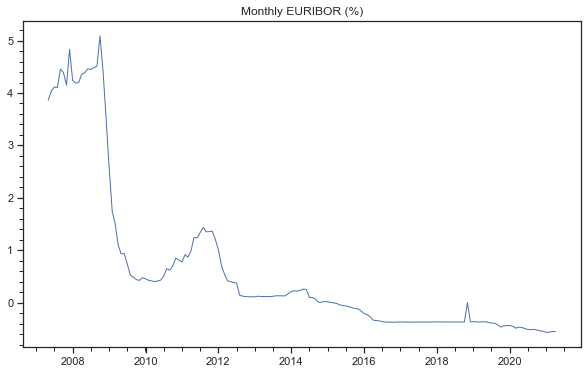

In [52]:
# examplary plot of data

sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(10,6))
y = data['EURIBOR']

ax.plot(x, y, '-', linewidth = 1)
#ax.set_title('G-REITs Weighted Average Daily Total Return',fontsize=12)
ax.grid(False)
ax.minorticks_on()
ax.set_title('Monthly EURIBOR (%)',fontsize=12)

ADF(data['G-REIT Return'])

In [16]:
def reit_vs_interest_rate(dtf):

  figsize = (5,10)

  ### scatter plot
  sns.set(style="ticks", color_codes=True)
  j = sns.jointplot(y=data['G-REIT Return'], x = data['EURIBOR'], data=dtf, dropna=False, kind='reg', 
                height=int((figsize[0]+figsize[1])/2))
  r, p = stats.pearsonr(x=data['EURIBOR'], y=data['G-REIT Return'])
  j.ax_joint.annotate('Pearson Coeff r = {:.3f} '.format(r), xy=(.1, .1), xycoords=ax.transAxes)
  j.ax_joint.annotate('p-value = {:.3e}'.format(p), xy=(.4, .1), xycoords=ax.transAxes)

  plt.show()
    
def reit_vs_inflation(dtf):

  figsize = (5,10)

  ### scatter plot
  sns.set(style="ticks", color_codes=True)
  j = sns.jointplot(y=data['G-REIT Return'], x = data['Inflation'], data=dtf, dropna=False, kind='reg', 
                height=int((figsize[0]+figsize[1])/2), color = "c")
  r, p = stats.pearsonr(x=data['Inflation'], y=data['G-REIT Return'])
  j.ax_joint.annotate('Pearson Coeff r = {:.3f} '.format(r), xy=(.1, .1), xycoords=ax.transAxes)
  j.ax_joint.annotate('p-value = {:.3e}'.format(p), xy=(.4, .1), xycoords=ax.transAxes)

  plt.show()
    
def reit_vs_output_gap(dtf):

  figsize = (5,10)

  ### scatter plot
  sns.set(style="ticks", color_codes=True)
  j = sns.jointplot(y=data['G-REIT Return'], x = data['Output Gap'], data=dtf, dropna=False, kind='reg', 
                height=int((figsize[0]+figsize[1])/2), color = "g")
  r, p = stats.pearsonr(x=data['Output Gap'], y=data['G-REIT Return'])
  j.ax_joint.annotate('Pearson Coeff r = {:.3f} '.format(r), xy=(.1, .1), xycoords=ax.transAxes)
  j.ax_joint.annotate('p-value = {:.3e}'.format(p), xy=(.4, .1), xycoords=ax.transAxes)

  plt.show()

def reit_vs_m3(dtf):

  figsize = (5,10)

  ### scatter plot
  sns.set(style="ticks", color_codes=True)
  j = sns.jointplot(y=data['G-REIT Return'], x = data['M3'], data=dtf, dropna=False, kind='reg', 
                height=int((figsize[0]+figsize[1])/2), color = "m")
  r, p = stats.pearsonr(x=data['M3'], y=data['G-REIT Return'])
  j.ax_joint.annotate('Pearson Coeff r = {:.3f} '.format(r), xy=(.1, .1), xycoords=ax.transAxes)
  j.ax_joint.annotate('p-value = {:.3e}'.format(p), xy=(.4, .1), xycoords=ax.transAxes)

  plt.show()
    
#sns color code 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'

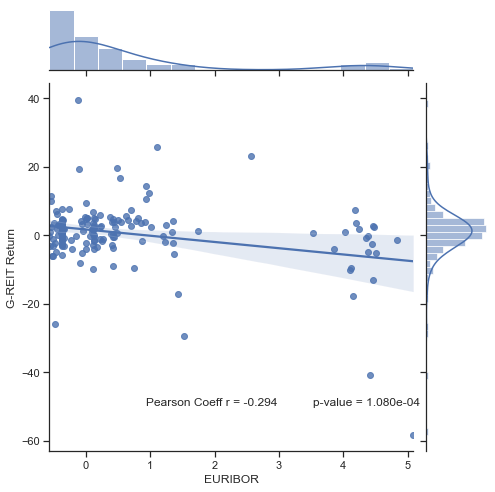

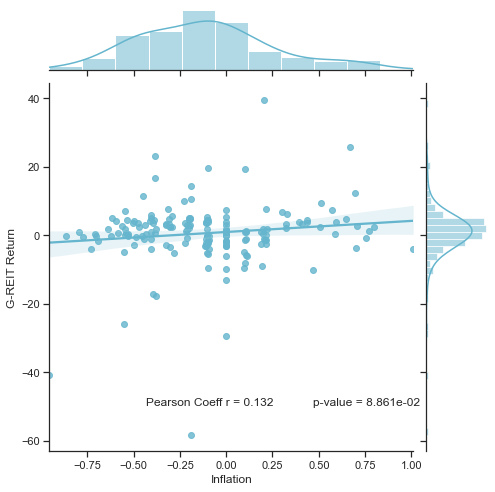

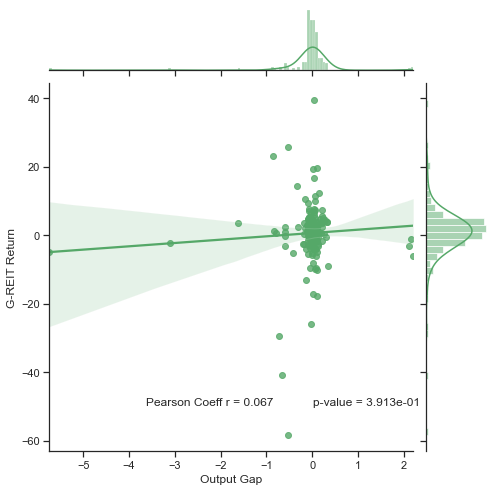

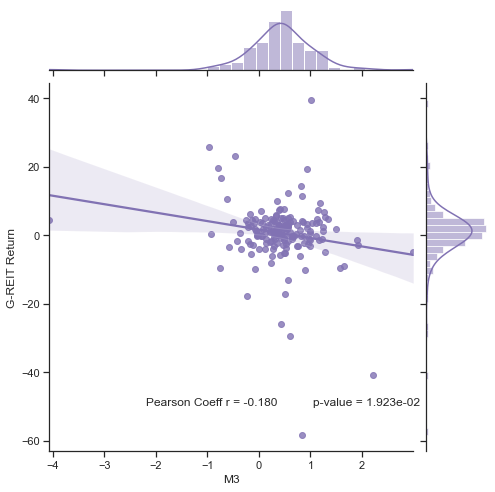

In [17]:
reit_vs_interest_rate(data)
reit_vs_inflation(data)
reit_vs_output_gap(data)
reit_vs_m3(data)

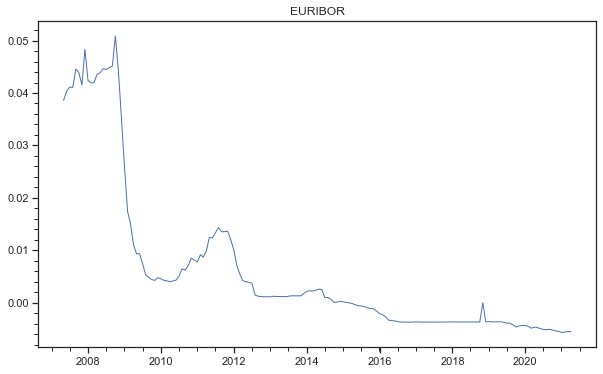

In [18]:
data = pd.read_excel('data_v1.xlsx', sheet_name = 'Data')

dates = data['Date']
x = [datetime.strptime(str(d),"%m/%Y").date() for d in dates]
y = data['EURIBOR%']
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y, '-', linewidth = 1)

ax.set_title('EURIBOR',fontsize=12)

ax.grid(False)
ax.minorticks_on()


In [19]:
# model decision: markov dynamic switching model: due to the relative high frequency of data
# --- Aufgrund des XXX papers, nutzen wir TVTP modell. Für jeden Schritt eine Begründung zu geben.
# --- Ziel ist für einen fremden, macht alle begründungen sinn
# model decision: two models to compare: fixed transition probability (FTP) and time-varying transition probabilities (TVTP)
# deciding on the number of state in the markov --> Akaike Information Creterion (AIC) and log likelihood



In [20]:
# FTP 2-state markov dynamic switching model

data = pd.read_excel('data_v1.xlsx', sheet_name = 'Data')

reitsdata = pd.Series.tolist(data['G-REIT Return'])
lsdata = pd.Series(reitsdata, index=pd.date_range('2007-05', '2021-05', freq='M'))

mod_lsdata = sm.tsa.MarkovRegression(lsdata, exog = pd.Series.tolist(data['EURIBOR']), k_regimes =2)

res_lsdata = mod_lsdata.fit()

res_lsdata.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                  168
Model:               MarkovRegression   Log Likelihood                -572.047
Date:                Sat, 17 Jul 2021   AIC                           1158.094
Time:                        05:05:18   BIC                           1179.962
Sample:                    05-31-2007   HQIC                          1166.969
                         - 04-30-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9138      0.607      3.155      0.002       0.725       3.103
x1            -0.6390      0.382     -1.673      0.094      -1.388       0.110
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2104      4.508     -0.712      0.476     -12.046       5.625
x1           -10.0695      1.402     -7.182      0.000     -12.817      -7.322
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        46.1840      5.240      8.813      0.000      35.913      56.455
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9509      0.035     26.939      0.000       0.882       1.020
p[1->0]        0.7681      0.207      3.714      0.000       0.363       1.173
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

[20.38408449  1.30187167]


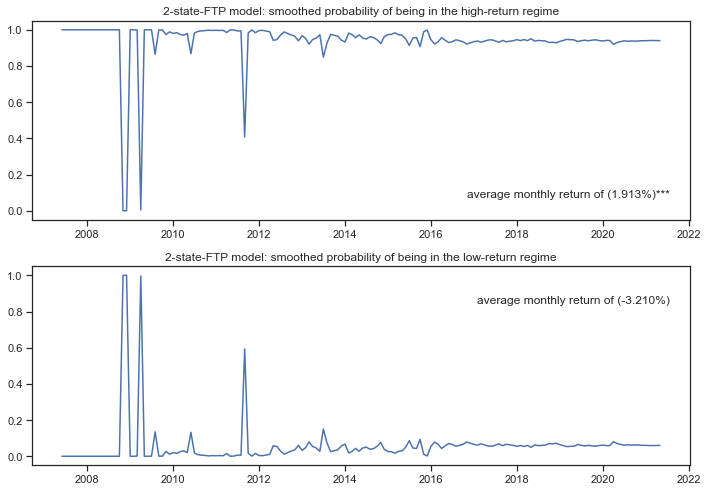

In [35]:
# plot of possibility of each state
# -- erklären warum die subprime crises nicht in 2007 gestartet ist. 
# -- Vermutungen: 1. in deutschland gibt es diese krise nicht richtig. - stock market is not influenced
# -- 2. - only real estate sector is not influenced

fig, axes = plt.subplots(2, figsize=(10, 7))

ax = axes[0]
ax.plot(res_lsdata.smoothed_marginal_probabilities[0])
ax.set(title='2-state-FTP model: smoothed probability of being in the high-return regime')
ax.annotate('average monthly return of (1.913%)***',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

ax = axes[1]
ax.plot(res_lsdata.smoothed_marginal_probabilities[1])
ax.set(title='2-state-FTP model: smoothed probability of being in the low-return regime')
ax.annotate('average monthly return of (-3.210%)',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 160), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

fig.tight_layout()

print(res_lsdata.expected_durations)

In [30]:
# FTP 3-state markov dynamic switching model

mod_lsdata5 = sm.tsa.MarkovRegression(lsdata, exog = pd.Series.tolist(data['EURIBOR']), k_regimes =3)


res_lsdata5 = mod_lsdata5.fit()

res_lsdata5.summary()

# Most likely, one of your variance parameters is converging to zero. If you get a model result and the parameter estimates and standard errors are finite, I think you can just use them and ignore all the warnings. Note that inference for variance parameters is not meaningful when the point estimate is at or near zero.


/Users/yimingwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                  168
Model:               MarkovRegression   Log Likelihood                -539.238
Date:                Sun, 18 Jul 2021   AIC                           1104.476
Time:                        14:46:22   BIC                           1145.088
Sample:                    05-31-2007   HQIC                          1120.958
                         - 04-30-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.5801      2.479      9.913      0.000      19.720      29.440
x1            -5.6113      2.307     -2.432      0.015     -10.133      -1.090
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9167      0.440      2.084      0.037       0.055       1.779
x1            -0.7709      0.317     -2.433      0.015      -1.392      -0.150
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.4729      4.909     -1.522      0.128     -17.095       2.149
x1            -9.1237      1.523     -5.989      0.000     -12.109      -6.138
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        27.0917      2.858      9.481      0.000      21.491      32.692
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.5689      0.169      3.376      0.001       0.239       0.899
p[1->0]     1.939e-06      0.089   2.17e-05      1.000      -0.175       0.175
p[2->0]        0.7926      0.445      1.782      0.075      -0.079       1.664
p[0->1]        0.3060      0.241      1.268      0.205      -0.167       0.779
p[1->1]        0.9835      0.081     12.075      0.000       0.824       1.143
p[2->1]        0.0008      0.354      0.002      0.998      -0.694       0.696
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

[20.38408449  1.30187167]


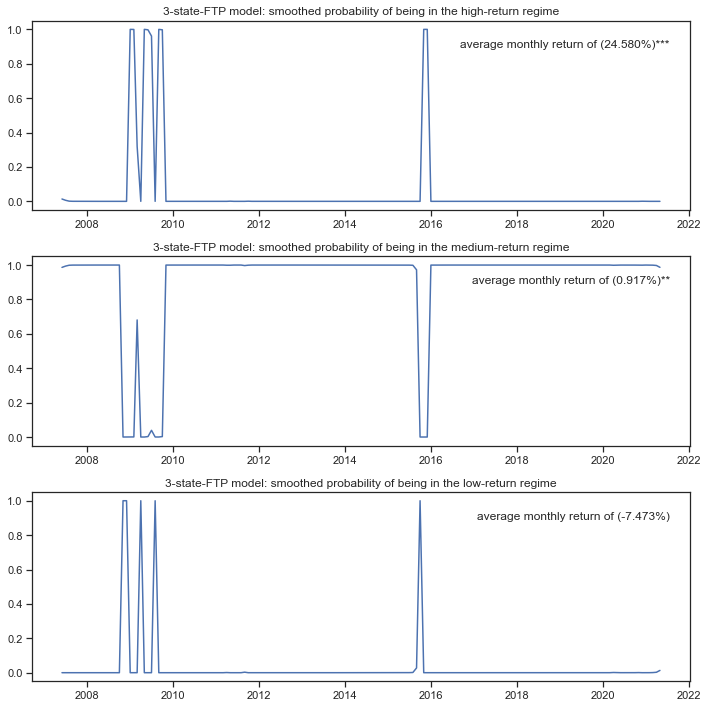

In [36]:
# Due to lower information criteria, we might prefer the 3-state model,
# with an interpretation of low-, medium-, and high-interest rate regimes.
# The smoothed probabilities of each regime are plotted below.
# -- find whats the grenzen for the high low medium returns. intervalle für jeden zustand --> ökonomisch erklären, ob es median ist

fig, axes = plt.subplots(3, figsize=(10, 10))

ax = axes[0]
ax.plot(res_lsdata5.smoothed_marginal_probabilities[0])
ax.set(title='3-state-FTP model: smoothed probability of being in the high-return regime')
ax.annotate('average monthly return of (24.580%)***',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 160), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

ax = axes[1]
ax.plot(res_lsdata5.smoothed_marginal_probabilities[1])
ax.set(title='3-state-FTP model: smoothed probability of being in the medium-return regime')
ax.annotate('average monthly return of (0.917%)**',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 160), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

ax = axes[2]
ax.plot(res_lsdata5.smoothed_marginal_probabilities[2])
ax.set(title='3-state-FTP model: smoothed probability of being in the low-return regime')
ax.annotate('average monthly return of (-7.473%)',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 160), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

fig.tight_layout()

print(res_lsdata.expected_durations)

In [105]:
# FTP 4,5,6-state markov dynamic switching model

mod_lsdata_4 = sm.tsa.MarkovRegression(lsdata, exog = pd.Series.tolist(data['EURIBOR']), k_regimes =4)
mod_lsdata_5 = sm.tsa.MarkovRegression(lsdata, exog = pd.Series.tolist(data['EURIBOR']), k_regimes =5)
mod_lsdata_6 = sm.tsa.MarkovRegression(lsdata, exog = pd.Series.tolist(data['EURIBOR']), k_regimes =6)


res_lsdata_4 = mod_lsdata_4.fit()
res_lsdata_5 = mod_lsdata_5.fit()
res_lsdata_6 = mod_lsdata_6.fit()


print ('4-state aic:', res_lsdata_4.log)
print ('5-state aic:', res_lsdata_5.log)
print ('6-state aic:', res_lsdata_6.log)


/Users/yimingwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yimingwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yimingwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AttributeError: 'MarkovRegressionResults' object has no attribute 'log'

In [ ]:
#duration of the 3-state model

print(res_lsdata5.expected_durations)

In [215]:
#---------------------------------------------TVTP-----------------------------------------------
#TVTP 3-state model
# ### Taylor rule with 2 or 3 regimes
#
# We now include three additional exogenous variables - a measure of the
# output gap, inflation and money supple m3 - to estimate a switching Taylor-
# type rule with both 2 and 3 regimes to see which fits the data better.
#
# Because the models can be often difficult to estimate, for the 3-regime
# model we employ a search over starting parameters to improve results,
# specifying 20 random search repetitions.
# get data for taylor rule

unemploydata = pd.Series.tolist(data['Unemployment'])
lsdata_unemployment = pd.Series(unemploydata, index=pd.date_range('2007-05', '2021-05', freq='M'))

ogapdata = pd.Series.tolist(data['Output Gap'])
lsdata_ogap = pd.Series(ogapdata, index=pd.date_range('2007-05', '2021-05', freq='M'))

infdata = pd.Series.tolist(data['Inflation'])
lsdata_inf = pd.Series(infdata, index=pd.date_range('2007-05', '2021-05', freq='M'))

m3data = pd.Series.tolist(data['M3'])
lsdata_m3= pd.Series(m3data, index=pd.date_range('2007-05', '2021-05', freq='M'))

exog = pd.concat((lsdata, lsdata_ogap, lsdata_inf, lsdata_m3), axis=1)
print(exog)

                    0         1         2         3
2007-05-31  -3.941142  0.080852 -0.094473  0.275506
2007-06-30   1.043192  0.089041  0.188857  0.438072
2007-07-31  -9.656293  0.093747  0.094295  1.578569
2007-08-31 -10.048024  0.098211  0.470147  0.896662
2007-09-30   2.681424  0.103618 -0.564442  0.566959
...               ...       ...       ...       ...
2020-12-31  10.072447  0.070655 -0.225225  0.352426
2021-01-31  -0.271949 -0.583595 -0.451978  0.504627
2021-02-28  -3.207160 -0.586445  0.000000  0.732097
2021-03-31   1.011630 -0.588969 -0.795911  0.303943
2021-04-30   2.531220 -0.588969  0.795911  1.234900

[168 rows x 4 columns]


In [37]:
# Fit the 2-regime model
mod_lsdata_2_tvtp = sm.tsa.MarkovAutoregression(lsdata, k_regimes=2, order = 4, switching_ar = False)

np.random.seed(12345)
res_lsdata_2_tvtp = mod_lsdata_2_tvtp.fit(search_reps=20)
res_lsdata_2_tvtp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                        y   No. Observations:                  164
Model:             MarkovAutoregression   Log Likelihood                -580.565
Date:                  Sun, 18 Jul 2021   AIC                           1179.129
Time:                          14:54:23   BIC                           1207.028
Sample:                      05-31-2007   HQIC                          1190.455
                           - 04-30-2021                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7893        nan        nan        nan         nan         nan
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8282        nan        nan        nan         nan         nan
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        69.5595      7.656      9.086      0.000      54.555      84.564
ar.L1          0.3129      0.076      4.126      0.000       0.164       0.461
ar.L2         -0.2156      0.079     -2.716      0.007      -0.371      -0.060
ar.L3          0.0190      0.079      0.239      0.811      -0.137       0.175
ar.L4          0.2276      0.075      3.017      0.003       0.080       0.375
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.4216     83.761      0.005      0.996    -163.747     164.590
p[1->0]        0.4918    172.334      0.003      0.998    -337.277     338.260
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

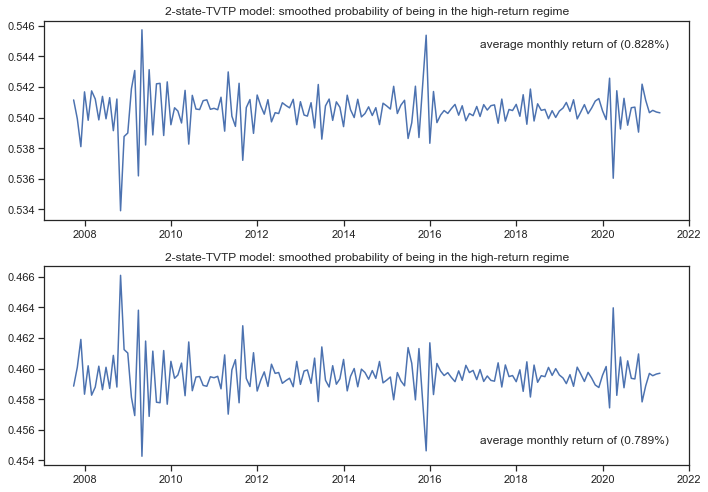

In [39]:
# plot 2-state model
fig, axes = plt.subplots(2, figsize=(10, 7))

ax = axes[0]
ax.plot(res_lsdata_2_tvtp.smoothed_marginal_probabilities[1])
ax.set(title='2-state-TVTP model: smoothed probability of being in the high-return regime')
ax.annotate('average monthly return of (0.828%)',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 180), textcoords='offset pixels',
            horizontalalignment='right', verticalalignment='top')

ax = axes[1]
ax.plot(res_lsdata_2_tvtp.smoothed_marginal_probabilities[0])
ax.set(title='2-state-TVTP model: smoothed probability of being in the high-return regime')

ax.annotate('average monthly return of (0.789%)',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

fig.tight_layout()

In [200]:
# Fit the 3-regime model
mod_lsdata_3_tvtp = sm.tsa.MarkovAutoregression(lsdata, k_regimes=3, order = 4, switching_ar=False, exog_tvtp=exog)

np.random.seed(12345)
res_lsdata_3_tvtp = mod_lsdata_3_tvtp.fit(search_reps=20)
res_lsdata_3_tvtp.summary()

/Users/yimingwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                        y   No. Observations:                  164
Model:             MarkovAutoregression   Log Likelihood                -540.758
Date:                  Sat, 17 Jul 2021   AIC                           1157.516
Time:                          04:08:12   BIC                           1275.311
Sample:                      05-31-2007   HQIC                          1205.337
                           - 04-30-2021                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3415      0.847      6.309      0.000       3.682       7.001
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.9803      1.081     -6.454      0.000      -9.100      -4.861
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0608      1.060     -1.001      0.317      -3.139       1.017
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        42.7454      4.730      9.036      0.000      33.474      52.017
ar.L1          0.3482      0.077      4.504      0.000       0.197       0.500
ar.L2         -0.2562      0.082     -3.123      0.002      -0.417      -0.095
ar.L3         -0.0555      0.081     -0.682      0.495      -0.215       0.104
ar.L4          0.2342      0.077      3.051      0.002       0.084       0.385
                           Regime transition parameters                          
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
p[0->0].tvtp0   143.4161    151.374      0.947      0.343    -153.271     440.104
p[1->0].tvtp0    14.2476    260.567      0.055      0.956    -496.455     524.950
p[2->0].tvtp0    65.6781   2.31e+04      0.003      0.998   -4.53e+04    4.54e+04
p[0->0].tvtp1    -9.1461    555.744     -0.016      0.987   -1098.383    1080.091
p[1->0].tvtp1    48.8140   1131.751      0.043      0.966   -2169.377    2267.005
p[2->0].tvtp1     0.1786        nan        nan        nan         nan         nan
p[0->0].tvtp2    25.0661   4575.378      0.005      0.996   -8942.510    8992.643
p[1->0].tvtp2    80.4034   1868.717      0.043      0.966   -3582.214    3743.021
p[2->0].tvtp2     6.3195   8.56e+04   7.38e-05      1.000   -1.68e+05    1.68e+05
p[0->0].tvtp3   -21.5979    264.038     -0.082      0.935    -539.104     495.908
p[1->0].tvtp3   -85.3461   1407.111     -0.061      0.952   -2843.233    2672.541
p[2->0].tvtp3     4.0956   7.85e+04   5.22e-05      1.000   -1.54e+05    1.54e+05
p[0->0].tvtp4  

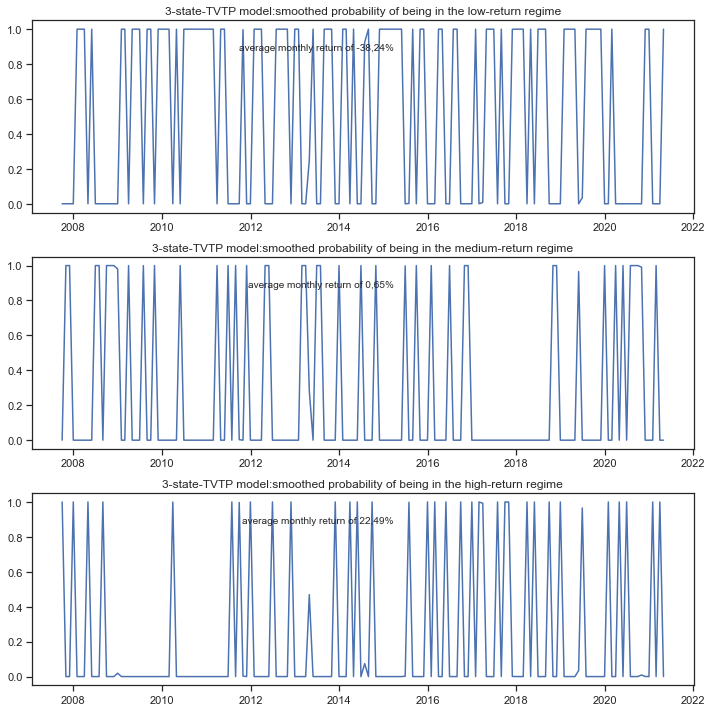

In [201]:
# Plot 3-state TVTP
# with an interpretation of low-, medium-, and high-interest rate regimes.
# The smoothed probabilities of each regime are plotted below.
fig, axes = plt.subplots(3, figsize=(10, 10))

ax = axes[0]
ax.plot(res_lsdata_3_tvtp.smoothed_marginal_probabilities[0])
ax.set(title='3-state-TVTP model:smoothed probability of being in the low-return regime')
ax.annotate('average monthly return of -38,24%',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-300, 160), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

ax = axes[1]
ax.plot(res_lsdata_3_tvtp.smoothed_marginal_probabilities[1])
ax.set(title='3-state-TVTP model:smoothed probability of being in the medium-return regime')
ax.annotate('average monthly return of 0,65%',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-300, 160), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

ax = axes[2]
ax.plot(res_lsdata_3_tvtp.smoothed_marginal_probabilities[2])
ax.set(title='3-state-TVTP model:smoothed probability of being in the high-return regime')
ax.annotate('average monthly return of 22,49%',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-300, 160), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

fig.tight_layout()

In [41]:
# Fit the 4-regime model
mod_lsdata_4_tvtp = sm.tsa.MarkovAutoregression(lsdata, k_regimes=4,  switching_ar=False, order = 4)

np.random.seed(12345)
res_lsdata_4_tvtp = mod_lsdata_4_tvtp.fit(search_reps=20)
res_lsdata_4_tvtp.summary()

/Users/yimingwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                        y   No. Observations:                  164
Model:             MarkovAutoregression   Log Likelihood                -528.954
Date:                  Sun, 18 Jul 2021   AIC                           1099.908
Time:                          14:58:31   BIC                           1165.005
Sample:                      05-31-2007   HQIC                          1126.335
                           - 04-30-2021                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.2368      2.614    -14.627      0.000     -43.360     -33.113
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1333        nan        nan        nan         nan         nan
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8084      0.472      1.714      0.087      -0.116       1.733
                             Regime 3 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4938      2.002     10.236      0.000      16.570      24.418
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        24.5298      2.705      9.069      0.000      19.229      29.831
ar.L1          0.2236      0.080      2.779      0.005       0.066       0.381
ar.L2         -0.1721      0.077     -2.224      0.026      -0.324      -0.020
ar.L3          0.1242      0.080      1.560      0.119      -0.032       0.280
ar.L4         -0.0117      0.077     -0.152      0.879      -0.163       0.139
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.1787      0.168      1.064      0.287      -0.151       0.508
p[1->0]        0.3017      0.148      2.037      0.042       0.011       0.592
p[2->0]        0.0157      0.011      1.492      0.136      -0.005       0.036
p[3->0]        0.0117      0.360      0.033      0.974      -0.694       0.717
p[0->1]        0.1579      0.136      1.165      0.244      -0.108       0.423
p[1->1]        0.2286      0.467      0.490      0.624      -0.686       1.143
p[2->1]      3.45e-05        nan        nan        nan         nan         nan
p[3->1]        0.2116        nan        nan        nan         

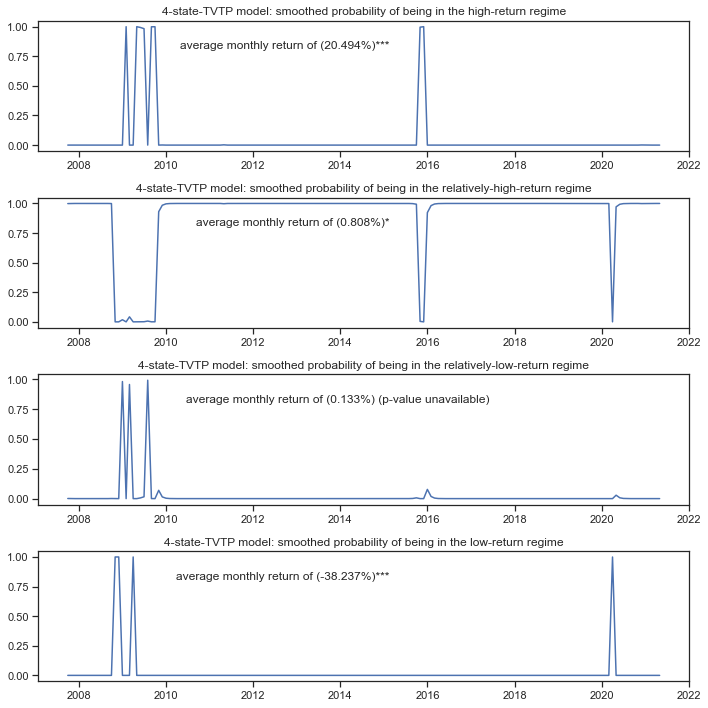

In [54]:
# Plot 4-state TVTP
# Due to lower information criteria, we prefer the 4-state model,
# with an interpretation of low-, medium-, and high-interest rate regimes.
# The smoothed probabilities of each regime are plotted below.
fig, axes = plt.subplots(4, figsize=(10, 10))

ax = axes[0]
ax.plot(res_lsdata_4_tvtp.smoothed_marginal_probabilities[3])
ax.set(title='4-state-TVTP model: smoothed probability of being in the high-return regime')
ax.annotate('average monthly return of (20.494%)***',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-300, 100), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

ax = axes[1]
ax.plot(res_lsdata_4_tvtp.smoothed_marginal_probabilities[2])
ax.set(title='4-state-TVTP model: smoothed probability of being in the relatively-high-return regime')
ax.annotate('average monthly return of (0.808%)*',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-300, 100), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

ax = axes[2]
ax.plot(res_lsdata_4_tvtp.smoothed_marginal_probabilities[1])
ax.set(title='4-state-TVTP model: smoothed probability of being in the relatively-low-return regime')
ax.annotate('average monthly return of (0.133%) (p-value unavailable)',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-200, 100), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
ax = axes[3]
ax.plot(res_lsdata_4_tvtp.smoothed_marginal_probabilities[0])
ax.set(title='4-state-TVTP model: smoothed probability of being in the low-return regime')
ax.annotate('average monthly return of (-38.237%)***',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-300, 100), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

fig.tight_layout()

In [ ]:
res_lsdata_4_tvtp.expected_durations[2].plot(
    title='Expected duration of a low-production state', figsize=(12,3));

In [7]:
# Fit the 5-regime model
mod_lsdata_5_tvtp = sm.tsa.MarkovAutoregression(lsdata, k_regimes=5, order = 4, switching_ar=False, exog_tvtp=exog.dropna(inplace=True))

np.random.seed(12345)
res_lsdata_5_tvtp = mod_lsdata_5_tvtp.fit(search_reps=20)
res_lsdata_5_tvtp.summary()


NameError: name 'lsdata' is not defined

In [8]:
# Fit the 6-regime model
mod_lsdata_6_tvtp = sm.tsa.MarkovAutoregression(lsdata, k_regimes=6, order = 4, switching_ar=False, exog_tvtp=exog.dropna(inplace=True))

np.random.seed(12345)
res_lsdata_6_tvtp = mod_lsdata_6_tvtp.fit(search_reps=20)
res_lsdata_6_tvtp.summary()

NameError: name 'lsdata' is not defined

In [9]:
# Fit the 3-regime model
# Because the models can be often difficult to estimate, for the 3-regime
# model we employ a search over starting parameters to improve results,
# specifying 20 random search repetitions.
# get data for taylor rule

print(res_lsdata_3_tvtp.expected_durations)

NameError: name 'res_lsdata_3_tvtp' is not defined

In [10]:
# plot 3-state model
# fig, axes = plt.subplots(2, figsize=(10, 7))

# ax = axes[0]
# ax.plot(res_lsdata4.smoothed_marginal_probabilities[0])
# ax.set(title='Smoothed TVTP probability of a low-return regime')

# ax = axes[1]
# ax.plot(res_lsdata4.smoothed_marginal_probabilities[1])
# ax.set(title='Smoothed TVTP probability of a medium-return regime')

# ax = axes[2]
# ax.plot(res_lsdata4.smoothed_marginal_probabilities[1])
# ax.set(title='Smoothed TVTP probability of a high-return regime')

# fig.tight_layout()

In [11]:
# Alternative to the AIC Comparison
# LRT TEST
# 2-state/3-state
# https://zhangzhenhu.github.io/blog/glm/source/%E6%A8%A1%E5%9E%8B%E8%AF%84%E4%BC%B0/content.html
# https://support.minitab.com/zh-cn/minitab/19/help-and-how-to/quality-and-process-improvement/capability-analysis/supporting-topics/distributions-and-transformations-for-nonnormal-data/what-is-the-likelihood-ratio-test/
# 例如，您可以使用似然比检验来将 1 参数指数分布的拟合优度与 2 参数指数分布的拟合优度进行比较。如果 LRT p 值小于 alpha 水平（通常为 0.05 或 0.10），您可以断定与 1 参数模型相比，无约束 2 参数模型能够为您的数据提供显著更好的拟合优度。
from scipy.stats.distributions import chi2
def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))

# log likelihood test for
LR = likelihood_ratio(-577.704,-553.280)


p = chi2.sf(LR, 1) # L2 has 1 DoF more than L1

print ('p: %.30f' % p)

p: 0.000000000002765873197649118405


In [12]:
LR = likelihood_ratio(-553.280,-577.704)


p = chi2.sf(LR, 1) # L2 has 1 DoF more than L1

print ('p: %.30f' % p)

p: 1.000000000000000000000000000000


In [ ]:
# -- reklären warum 2016 low return hat --> new issurers in the market? look into the raw data
# -- log likehood test warum nicht --> finde die gründe
# -- durchlesen geht nicht. first draft ganz grob feedback 
# nur eine version zum checken schicken. end of next week
# sehr technisches model -- ökonomische erklärungen -- auch für irregularities. 
# ich benutze das model weil es xxxx liefert
# gute erklärungen damit ein 0-nutzer es gut verstehen kann
# überraschungen müssen begründet werden. 
# ende sonntag --> 12.07 feedback. --> 05.07 dann 06.07 pdf schicken 